# Apprentissage Paramétrisé

Le classificateur k-NN (k-Nearest Neighbors) – un modèle d'apprentissage automatique si simple **qu'il ne réalise aucun "apprentissage" au sens propre.**
Nous n'avons qu'à stocker les données d'entraînement dans le modèle, puis effectuer les prédictions au moment du test en comparant les points de données test avec les données d'entraînement.

## Comment "apprendre" quelque chose ?

### Paramétrisation
La **paramétrisation** est le processus de définition des paramètres nécessaires d’un modèle donné.

### Fonction de Perte (Loss Function)
Une fonction de perte quantifie dans quelle mesure les étiquettes prédites sont en accord avec les étiquettes de vérité terrain.
**Illustration :**


![Fonction de perte](./asset/loss.png)

### Poids et biais (Weights and Biases)
- La **matrice de poids**, généralement notée **W**, et le **vecteur de biais**, noté **b**, sont appelés paramètres du classificateur.
Ces paramètres sont ajustés lors de l’entraînement pour augmenter l’exactitude des classifications, en fonction du retour de la fonction de perte.

#### Biais
Un **valeur de biais permet de décaler la fonction d'activation vers la gauche ou la droite**, ce qui peut être indispensable pour un apprentissage réussi.
Par exemple :
Sans biais :

![Sans biais](./asset/without_bias.png)

Avec biais (décalage vers la droite) :

![Avec biais](./asset/with_bias.png)

Ainsi, le réseau peut produire une sortie de 0 lorsque **x = 2** grâce au biais ajouté.

# Classification Linéaire

Supposons que notre ensemble d’entraînement soit représenté par **xi**, où chaque image possède une étiquette de classe associée **yi**.
Avec :
- **i = 1, ..., N** (N points de données)
- **yi = 1, ..., K** (K classes uniques possibles)

Cela signifie que nous avons **N** points de données de dimensionnalité **D**, répartis dans **K catégories uniques**.

### Fonction de Score
Nous cherchons une fonction de score **f** qui associe chaque image à des scores de classe.
Une méthode simple consiste à utiliser un mappage linéaire :

**f(xi, W, b) = W · xi + b**
où :
- **W · xi** désigne le produit scalaire entre **W** et **xi**.

### Illustration : Produit Scalaire
Voici une illustration simple du produit scalaire :

![Illustration produit scalaire](./asset/parameters_learn.png)

In [ ]:
!pip install -q opencv-contrib-python matplotlib numpy scikit-learn torch torchvision nbconvert

## Demo

In [8]:
import numpy as np


class LinearLayer:
    def __init__(self, input_dim, output_dim):
        # Initialisation des paramètres de la couche linéaire.
        # La matrice de poids ("weights") est initialisée de manière aléatoire en utilisant une distribution normale.
        # Les poids ont des dimensions correspondant respectivement aux entrées (input_dim) et aux sorties (output_dim).
        self.weights = np.random.randn(input_dim, output_dim)

        # Le biais ("bias") est également initialisé de manière aléatoire avec une taille équivalente au nombre de sorties (output_dim).
        # Chaque biais est associé à une sortie particulière.
        self.bias = np.random.randn(output_dim)

    def forward(self, inputs):
        # La méthode "forward" effectue une passe avant de la couche (c'est-à-dire un calcul simple des activations).
        # Le produit matriciel entre les entrées ("inputs") et les poids ("weights") est calculé,
        # suivi de l'ajout du biais ("bias") correspondant à chaque sortie.
        # Renvoie les activations de sortie.
        return np.dot(inputs, self.weights) + self.bias


labels = ["dog", "cat", "panda"]
np.random.seed(2)

# Taille d'une image carrée (par exemple, 32x32 pixels pour une seule dimension, largeur ou hauteur).
image_size = 32

# Par défaut, les images sont en niveaux de gris avec un seul canal de couleur.
color_chan = 1

# Initialisation d'une instance de la classe LinearLayer.
# Les dimensions d'entrée sont le produit de la taille de l'image et du nombre de canaux (taille totale de l'image aplatie en un vecteur unique).
# Les dimensions de sortie correspondent au nombre de catégories/labels possibles (3 : "dog", "cat", "panda").
# image_size * image_size * color_chan = 1024
layer = LinearLayer(image_size * image_size * color_chan, len(labels))

In [2]:
print(layer.weights.shape)
layer.weights

(1024, 3)


array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       ...,
       [ 0.62143464,  0.71025428,  0.58493273],
       [ 0.5687548 ,  0.54902271, -0.30243146],
       [ 1.20731703,  1.37766662,  0.63628393]], shape=(1024, 3))

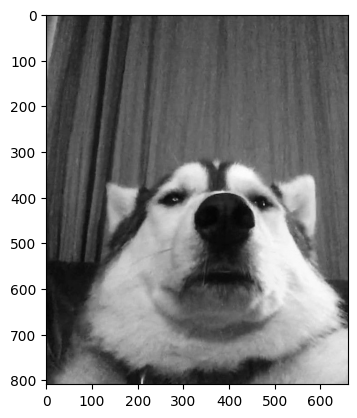

(1024,)


In [3]:
import cv2
from matplotlib import pyplot as plt

# load our example image, resize it, and then flatten it into our
# "feature vector" representation
orig = cv2.imread("./asset/old_dog.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(orig, cmap='gray')
plt.show()
x = cv2.resize(orig, (32, 32)).flatten()
# 32 * 32 (1024,) features
print(x.shape)

In [9]:
# Calcul des scores de sortie en effectuant une passe avant avec la méthode forward de la couche.
# Cela inclut deux étapes principales :
# 1. Produit matriciel entre les poids de la couche et les images (vecteurs d'entrée "x").
# 2. Ajout des biais à chaque sortie pour introduire une translation et permettre un décalage dans les activations.
scores = layer.forward(x)
for (label, score) in zip(labels, scores):
    print("[INFO] {}: {:.2f}".format(label, score))

[INFO] dog: -3997.94
[INFO] cat: -481.46
[INFO] panda: 1097.66



# Descente de Gradient (Optimiseur) en 5 minutes
![gradient](./asset/gradiant.png)

### Explication simple :
- À gauche, vous voyez Bob le robot.
- La tâche de Bob est d'explorer notre **paysage de perte** pour descendre jusqu'au **bas du bassin**.
- Cependant, Bob ne dispose que d'un seul capteur : sa **fonction de perte (L)**.

Ce capteur lui permet de prendre ses paramètres, **W** et **b**, et de calculer une **fonction de perte (L)**.
Mais Bob n'a absolument **aucune idée dans quelle direction** il doit bouger pour atteindre le fond du bassin.

### **Quelle est la solution ?**
**La réponse : appliquer la descente de gradient.**
Pour cela, Bob doit simplement suivre la **pente** donnée par le **gradient** par rapport aux dimensions **W** et **b**.

Mais qu'est-ce que le **gradient**, exactement ?

---


## Le Gradient : Définition et Intuition

### Définition mathématique :
Le **gradient** est un **vecteur** qui indique la direction du plus grand taux de variation d'une fonction.
- Si notre fonction est une **fonction de perte** ( L(W, b) ), le gradient pointe dans la direction où ( L ) augmente le plus rapidement.
- Donc, pour minimiser ( L ), nous allons dans la direction opposée au gradient.

En termes simples :
Le gradient agit comme une **boussole** qui indique la direction pour réduire la perte.

### Formule générale :
Pour une fonction ( L(x_1, x_2, ..., x_n) ), le gradient est défini comme :

$$
\nabla L = \left[ \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, \dots, \frac{\partial L}{\partial x_n} \right]
$$

Où chaque composante correspond à la dérivée partielle par rapport à une dimension ( x_i ).
Ce vecteur indique dans quelle direction modifier chaque paramètre pour réduire ( L ).

---


### Intuition géométrique :
1. Imaginez une colline ou une vallée dans un espace tridimensionnel.
2. Le gradient vous donne la **pente** la plus raide de la colline.
3. Descendre cette pente vous rapproche du point le plus bas (minimum).

Dans un espace multidimensionnel, le concept est similaire, mais il devient difficile à visualiser. Cependant, le gradient joue toujours le rôle de "pente généralisée".

---


### Rôle clé en apprentissage automatique :
- **But principal : Minimiser la perte.**
- Le gradient indique comment ajuster les paramètres, comme les poids (**W**) et les biais (**b**), pour réduire les erreurs.
- En appliquant l'algorithme de **descente de gradient**, on itère pas à pas jusqu'à trouver l'ensemble de paramètres qui minimise la fonction de perte ( L ).

---


## Pseudo-code illustratif : Descente de Gradient

```python
while True:
    Wgradient = evaluate_gradient(loss, data, W)  # Calcul du gradient
    W += -alpha * Wgradient                      # Mise à jour des paramètres avec le gradient
```

### Détails :
- **evaluate_gradient** calcule le vecteur du gradient. Par exemple, si ( **W** ) a 10 dimensions, nous obtenons un vecteur avec 10 valeurs (1 pour chaque dimension).
- La variable **Wgradient** contient les dérivées partielles pour chaque dimension.
- Nous modifions chaque paramètre ( W_i ) en suivant la direction **opposée** au gradient (multiplié par le taux d'apprentissage alpha)

$$
\alpha\
$$.

---


### Ajustement du **taux d'apprentissage** alpha :
- **alpha trop élevé :** Avance vite, mais risque de diverger ou de manquer le minimum global.
- **alpha trop faible :** Peut converger lentement, très long à entraîner.
- **Objectif :** Trouver une valeur équilibrée pour alpha.

---


## Exemple : Descente de Gradient appliquée à une fonction d'activation Sigmoïde

### Sigmoïde : Une fonction couramment utilisée
La fonction sigmoïde est définie comme :

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Elle a une forme en "S" et est utilisée pour "aplatir" les valeurs d'entrée dans un intervalle entre 0 et 1. Voici une représentation graphique :

![sigmoid](./asset/sigmoid_activation.png)

In [ ]:
class LinearLayer:
    def __init__(self, input_dim, output_dim):
        # Initialize la matrice de poids (weights) et le vecteur de biais (bias) avec des valeurs aléatoires
        # Les poids sont initialisés avec des petites valeurs proches de zéro dans le but d'éviter des gradients explosifs
        self.weights = np.random.randn(input_dim, output_dim) * 0.01  # On réduit l'échelle des poids
        self.bias = np.zeros(output_dim)  # Les biais sont initialisés à zéro
        self.input_dim = input_dim
        self.output_dim = output_dim

    def sigmoid(self, x):
        # Implémentation de la fonction d'activation sigmoid : f(x) = 1 / (1 + exp(-x))
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, z):
        # Calcul de la dérivée de la fonction sigmoid
        # La dérivée de sigmoid est : f'(x) = f(x) * (1 - f(x)), où f(x) est sigmoid
        sig = self.sigmoid(z)
        return sig * (1 - sig)

    def forward(self, inputs):
        # On calcule la sortie de la couche linéaire suivie de la fonction d'activation sigmoid
        # 1. Produit matriciel entre les entrées et les poids (inputs * weights)
        # 2. Ajout du biais
        # 3. Application de l'activation sigmoid
        return self.sigmoid(np.dot(inputs, self.weights) + self.bias)

    def backward(self, batch_x, batch_y, preds, learning_rate):
        # Rétropropagation pour ajuster les poids et les biais en fonction des erreurs calculées

        # Étape 1 : Calcul de l'erreur entre les prédictions (preds) et les vraies valeurs (batch_y)
        error = preds - batch_y

        # Une métrique de performance - Somme des carrés des erreurs (Loss quadratique)
        loss = np.sum(error ** 2)  # Ici, on retourne ultérieurement cette "perte" pour évaluer la performance

        # Étape 2 : Calcul du gradient pour la mise à jour des paramètres
        # On multiplie l'erreur par la dérivée de la sigmoid pour évaluer l'erreur propagée
        d = self.sigmoid_derivative(preds) * error

        # Calcul du gradient des poids : multiplication matricielle entre (batch_x.T) et d
        gradient = batch_x.T.dot(d)

        # Calcul du gradient pour le biais : somme de l'erreur propagée sur le batch
        bias_gradiant = np.sum(d, axis=0)

        # Étape 3 : Mise à jour des poids et des biais avec la descente de gradient
        # Règle de l'ajustement: paramètres nouveaux = paramètres anciens - (learning_rate * gradient)
        self.weights = self.weights - learning_rate * gradient
        self.bias = self.bias - learning_rate * bias_gradiant

        # Retourner la perte (loss) pour le suivi de la convergence
        return loss

### Build small dataset

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Génère un problème de classification binaire avec 1 000 points de données,
# où chaque point est représenté par un vecteur de 2 caractéristiques (dimensions).
# make_blobs permet de créer artificiellement des données regroupées en "clusters"
# et bien adaptées aux algorithmes de classification supervisée.
X, y = make_blobs(n_samples=1000,  # Nombre total de points de données
                  centers=2,  # Nombre de classes ou de clusters (ici, 2 classes)
                  n_features=2,  # Nombre de caractéristiques par point de données (2D)
                  random_state=22)

# Comme notre algorithme (implémentation actuelle) attend que y soit en 2 dimensions,
# on ajoute une dimension supplémentaire à y en utilisant np.newaxis.
# Cela transforme y d'un vecteur 1D (ex. [0, 1, 0, ...]) en un tableau 2D (ex. [[0], [1], [0], ...]).
y = y[:, np.newaxis]

# Affiche la forme de X : X est une matrice contenant 1 000 points de données (samples),
# chaque point ayant deux dimensions ou caractéristiques.
print(X.shape)  # (1000, 2)

# Affiche la forme de y : y est un vecteur 2D contenant 1 000 labels (1 par point),
# où chaque label appartient à une des deux classes, représentées par les valeurs 0 ou 1.
print(y.shape)  # (1000, 1)

In [ ]:
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

# Display the plot
plt.show()

In [ ]:
# Split du jeu de donnée en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)

### Creat train loop

In [ ]:
# Création d'une couche linéaire prenant comme entrée des vecteurs avec 2 caractéristiques
# (X.shape[1] correspond au nombre de colonnes/métriques de la matrice d'entrée X),
# et produisant une seule sortie (1 label, par ex., pour une tâche de classification binaire).
layer = LinearLayer(X.shape[1], 1)

# Définition du taux d'apprentissage (learning rate)
learning_rate = 0.01

# Nombre d'itérations (epochs) que l'algorithme parcourra sur les données pour entraîner le modèle.
num_epochs = 100

# Boucle principale d'entraînement : passe à travers le dataset `num_epochs` fois.
for epoch in range(num_epochs):
    # Étape 1 : Propagation avant (Forward pass)
    # Calcul des prédictions en passant les données d'entraînement (X_train)
    # à travers la couche linéaire et la fonction d'activation (sigmoid).
    preds = layer.forward(X_train)

    # Étape 2 : Rétropropagation (Backward pass)
    # Calcul des gradients des poids et des biais, mise à jour des paramètres
    # avec la descente de gradient, et calcul de la perte (loss).
    # Le `loss` sert à quantifier l'écart entre les prédictions et les vraies valeurs (y_train).
    loss = layer.backward(X_train, y_train, preds, learning_rate)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        print(f"""Y train
{y_train[:4]}  # Affichage des 4 premières vraies valeurs (y_train)
Y preds
{np.round(preds[:4], 4)}""")

### Evaluation du model

In [ ]:
from sklearn.metrics import classification_report

# evaluate our model
preds = layer.forward(X_test)
print(classification_report(y_test, np.around(preds)))

[un très bon article concernent la décente de gradiant](https://www.charlesbordet.com/fr/gradient-descent/#comment-ca-marche-)
